# ------------------------------------------------------------------------------------------------------------------

## This script makes a fancy Period_Mass Plot regarding detection methods of exoplanets using pandas.

### Fernando Gutiérrez-Canales
### January, 2021 (during the awful covid19)

# ------------------------------------------------------------------------------------------------------------------

In [1]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#We create a dataframe for our data. The data of all the confirmed exoplanets until today can be found in here
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=planets
# You can download a csv file with the columns that you want from that site. I donlowdaded a csv with just three
#columns: discovery method, Orbital Period and Minimum mass.
df = pd.read_csv("planets_2021.02.07.csv")
df

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [4]:
#As can be seen in the above dataframe, there are 4341 rows. That is, there 4341 exoplanets discovered so far. If we want to know how many exoplanets have been discovered with each method as out today (9th of February of 2020), we can just write the following line
df.groupby("pl_discmethod").count()

,Period[days],Mass[Jupiter Mass]
pl_discmethod,,
Astrometry,1,1
Disk Kinematics,0,1
Eclipse Timing Variations,16,16
Imaging,8,46
Microlensing,8,106
Orbital Brightness Modulation,6,3
Pulsar Timing,6,7
Pulsation Timing Variations,2,2
Radial Velocity,824,824


In [6]:
#As can be seen in the first dataframe, some exoplanets have both Period and Mass measurements, but others don't.
#It is useful to clean our dataframe in order to have only planets with both measurements.
#Now cleaning the dataframe will reduce the number of rows, of course. The nextline will create a new, clean dataframe.
df_clean = df.dropna()
df_clean

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [7]:
#As can be seen, the number of rows reduced from 4341 to just 1676. That is, there are only 1676 exoplanets with both period and minimum mass measurements.
#Now if you are interested in saving this dataframe as a new .csv file in the current directory, the next line will help
df_clean.to_csv('exoplanetas.csv', index = False) 

In [9]:
#The next line will tell you how many planets there are for each detection method in our clean dataframe.
df_clean.groupby("pl_discmethod").count()

,Period[days],Mass[Jupiter Mass]
pl_discmethod,,
Astrometry,1,1
Eclipse Timing Variations,16,16
Imaging,6,6
Microlensing,8,8
Orbital Brightness Modulation,3,3
Pulsar Timing,6,6
Pulsation Timing Variations,2,2
Radial Velocity,824,824
Transit,793,793


In [10]:
#Now, we can make a dataframe for the planets detected with each method. For instance, we can create a dataframe only with the planets detected via RV.
radial = df_clean[df_clean["pl_discmethod"].str.contains("Radial Velocity")]
radial

,pl_discmethod,Period[days],Mass[Jupiter Mass]
0,Radial Velocity,326.030000,19.4000
1,Radial Velocity,516.219970,14.7400
2,Radial Velocity,185.840000,4.8000
3,Radial Velocity,1773.400020,4.6600
4,Radial Velocity,798.500000,1.7800
...,...,...,...
4336,Radial Velocity,305.500000,20.6000
4337,Radial Velocity,4.617033,0.6876
4338,Radial Velocity,241.258000,1.9810
4339,Radial Velocity,1276.460000,4.1320


In [11]:
#The same can be done with the planets detected via the transit method. Nevertheless, we won't make the dataframe explicit for each detection method.
# In change, I will make a dataframe for each detection method as follows.
transit = df_clean[df_clean["pl_discmethod"].str.contains("Transit")]

In [12]:
micro = df_clean[df_clean["pl_discmethod"].str.contains("Microlensing")]

In [13]:
imagi = df_clean[df_clean["pl_discmethod"].str.contains("Imaging")]

In [14]:
eclip = df_clean[df_clean["pl_discmethod"].str.contains("Eclipse Timing Variations")]

In [15]:
pulsa = df_clean[df_clean["pl_discmethod"].str.contains("Pulsar Timing")]

In [16]:
brigh = df_clean[df_clean["pl_discmethod"].str.contains("Orbital Brightness Modulation")]

In [17]:
tr_va = df_clean[df_clean["pl_discmethod"].str.contains("Transit Timing Variations")]

In [18]:
astro = df_clean[df_clean["pl_discmethod"].str.contains("Astrometry")]

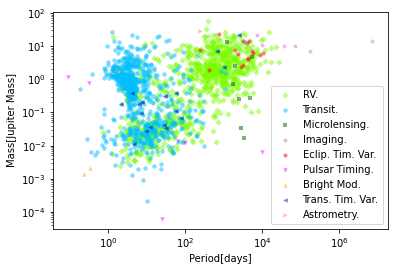

In [19]:
#Now we plot the log-log diagram. It is pure force. It is useful to make every plot in the plot a little bit transparent (alpha parameter).
ax = plt.gca()
radial.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "D", color='lawngreen', lw = 0, alpha = 0.5, logx = True, logy = True, label = "RV.", ax=ax)
transit.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "o", color='deepskyblue', lw = 0, alpha =0.5 , logx = True, logy = True, label="Transit.",ax=ax)
micro.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "s", color='darkgreen',lw = 0, alpha = 0.5, logx = True, logy = True, label="Microlensing.",ax=ax)
imagi.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "p", color='orchid',lw = 0, alpha = 0.5,  logx = True, logy = True, label="Imaging.",ax=ax)
eclip.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "H", color='red',lw = 0, alpha = 0.5, logx = True, logy = True, label="Eclip. Tim. Var.",ax=ax)
pulsa.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "v", color='magenta', lw = 0, alpha = 0.5, logx = True, logy = True, label="Pulsar Timing.",ax=ax)
brigh.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "^", color='orange', lw = 0, alpha = 0.5, logx = True, logy = True, label="Bright Mod.",ax=ax)
tr_va.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= "<", color='navy', lw = 0, alpha = 0.5, logx = True, logy = True, label="Trans. Tim. Var.",ax=ax)
astro.plot(kind='scatter', x='Period[days]',y='Mass[Jupiter Mass]', marker= ">", color='salmon', lw = 0, alpha = 0.5, logx = True, logy = True, label="Astrometry.",ax=ax)
#plt.savefig('detection_methods.eps',format='eps', bbox_inches='tight')
plt.savefig('detection_methods.png', format='png', bbox_inches='tight', dpi=300)
plt.show()